In [295]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import kneighbors_graph

,amygdala,acc,orientation
0,0.0051,-0.0286,2
1,-0.0674,0.0007,3
2,-0.0257,-0.0110,3
3,0.0504,-0.0167,2
4,0.0125,-0.0005,5
...,...,...,...
85,0.0174,-0.0242,2
86,0.0251,-0.0087,3
87,0.0676,0.0120,2
88,-0.0097,-0.0239,3


array([-0.0286,  0.0007, -0.011 , -0.0167, -0.0005,  0.0266, -0.0052,
        0.0099,  0.0124,  0.0217, -0.0018, -0.0224, -0.027 , -0.0122,
       -0.0085,  0.0031, -0.0218,  0.019 , -0.0054, -0.0107,  0.0334,
        0.0194,  0.0205, -0.0105,  0.0559, -0.0161,  0.0202, -0.0037,
        0.0037, -0.0105,  0.0215,  0.0348, -0.0042, -0.0216, -0.0023,
       -0.006 ,  0.0125, -0.0015, -0.0294, -0.0122, -0.0377,  0.0481,
       -0.0005, -0.0056, -0.0278, -0.0095,  0.0501, -0.0111,  0.0004,
        0.0065,  0.0044, -0.0099,  0.008 , -0.0127, -0.0255,  0.0178,
        0.0073, -0.0104,  0.0079,  0.0074,  0.023 ,  0.0137, -0.0035,
       -0.0065, -0.0005,  0.0363,  0.0005, -0.0107, -0.0145, -0.0101,
       -0.0076,  0.0106, -0.0071,  0.0183, -0.0241, -0.0236, -0.0232,
       -0.0124,  0.0352, -0.0031, -0.0186,  0.0462, -0.031 , -0.0111,
       -0.0148, -0.0242, -0.0087,  0.012 , -0.0239,  0.0502])

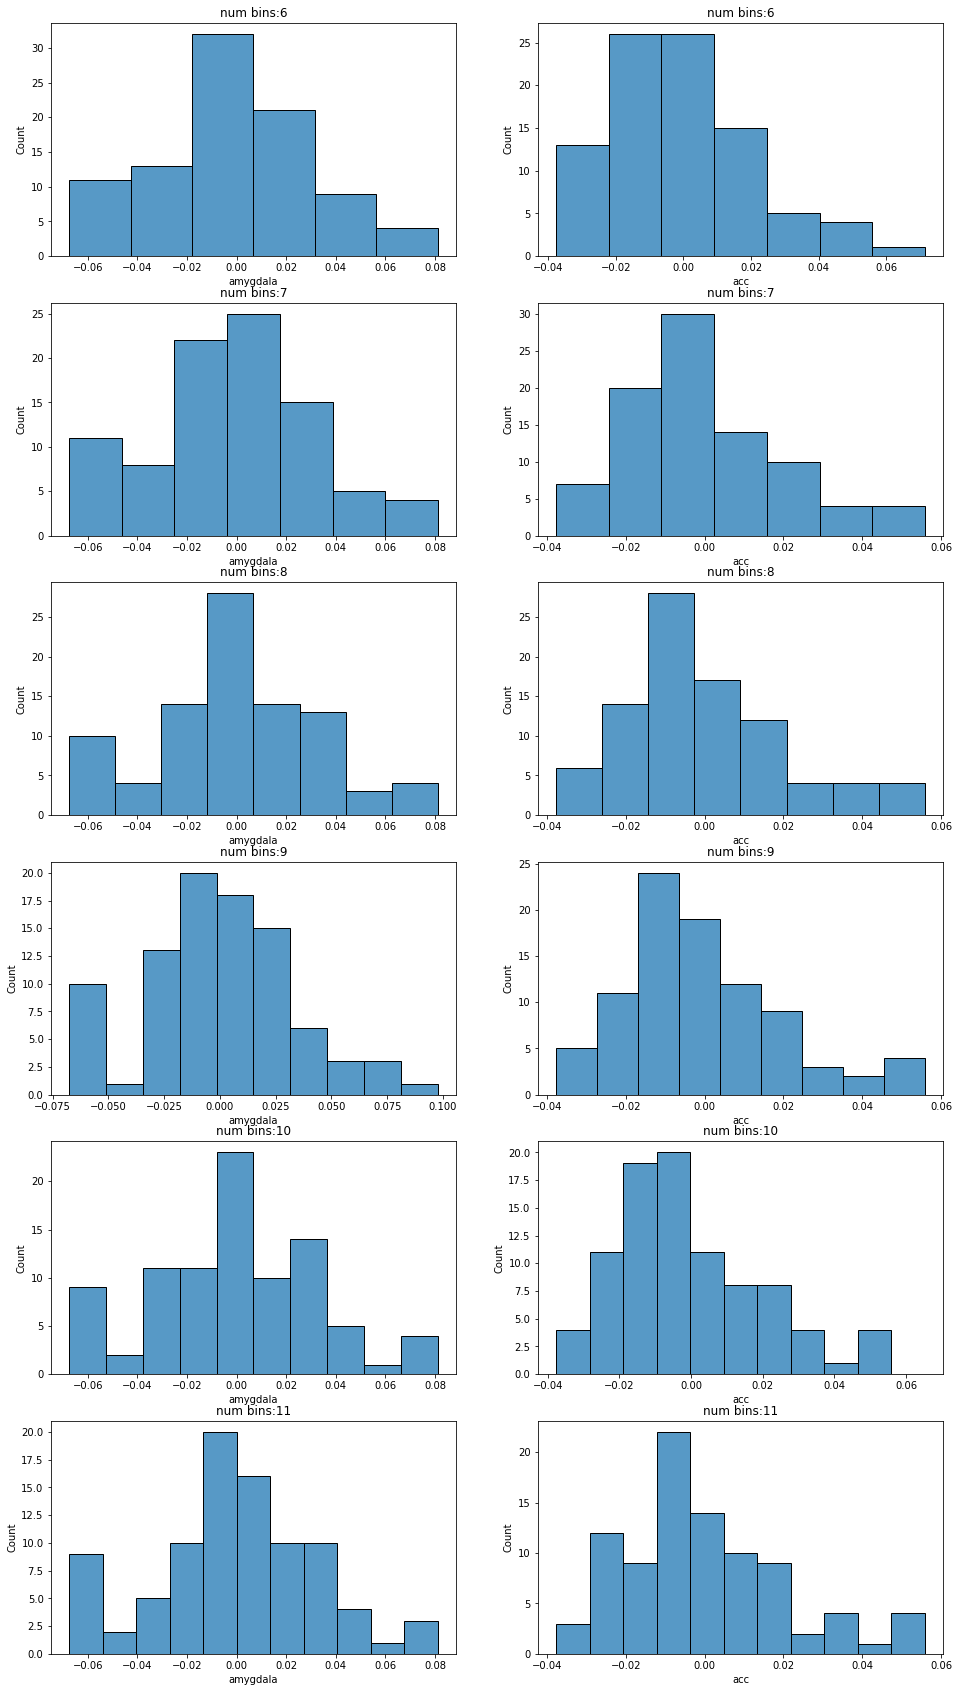

In [296]:
# 2.a 1-d Histogram
data = pd.read_csv('data/n90pol.csv')
display(data)
a=data.iloc[:, 1].to_numpy()
display(a)

fig, axes = plt.subplots(6, 2,figsize=(16,30))
i=0


for num_of_bins in range(6,12):
    amygdala_minRange=min(data.iloc[:,0])
    amygdala_maxRange=max(data.iloc[:,0])
    amyg_binSize=(amygdala_maxRange - amygdala_minRange)/num_of_bins
    
    acc_minRange=min(data.iloc[:,1])
    acc_maxRange=max(data.iloc[:,1])
    acc_binSize=(acc_maxRange - acc_minRange)/num_of_bins
    
    sns.histplot(ax=axes[i][0],data=data, x="amygdala", binwidth=amyg_binSize)
    axes[i][0].set_title("num bins:%s"%num_of_bins)
    axes[i][0].set_xlabel("amygdala")

    sns.histplot(ax=axes[i][1],data=data, x="acc", binwidth=acc_binSize)
    axes[i][1].set_title("num bins:%s"%num_of_bins)
    axes[i][1].set_xlabel("acc")
    i+=1
    
    


std dev and n for amygdala: 0.001984299693119354 90
bandwidth calualted:  0.4065851364889782
0.020321534068902875
bandwidth caluclated by gaussian kde library method: 0.008262433703070296


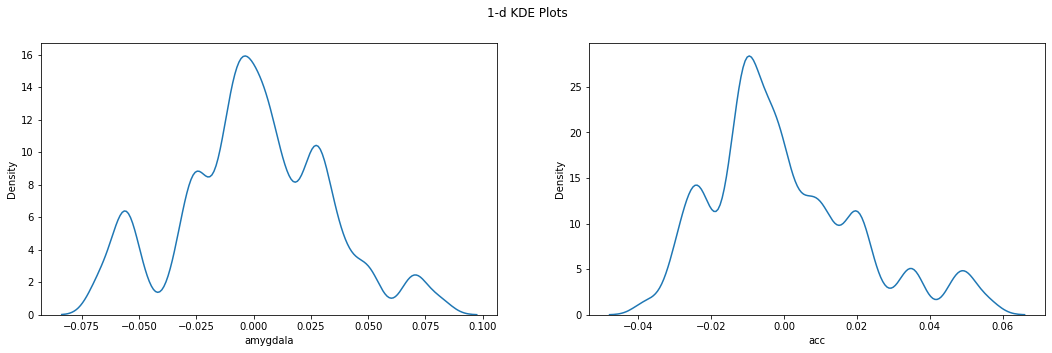

In [284]:
#### 2.a 1-d KDE Plot

## KDE Plots
sigma=np.std(data, ddof=1) / np.sqrt(np.size(data))
n = data.shape[0]
print("std dev and n for amygdala:",sigma["amygdala"], n)

bw=(n ** (-1/5))
print("bandwidth calualted: ",bw)

kde = gaussian_kde(a)
f = kde.covariance_factor()
bw_scipy = f * a.std()
print(a.std())
print("bandwidth caluclated by gaussian kde library method:",bw_scipy)


fig2, axes2 = plt.subplots(1, 2,figsize=(18,5))
fig2.suptitle('1-d KDE Plots')
sns.kdeplot(ax=axes2[0],data=data, x="amygdala",bw_adjust=bw)
sns.kdeplot(ax=axes2[1],data=data, x="acc",bw_adjust=bw)

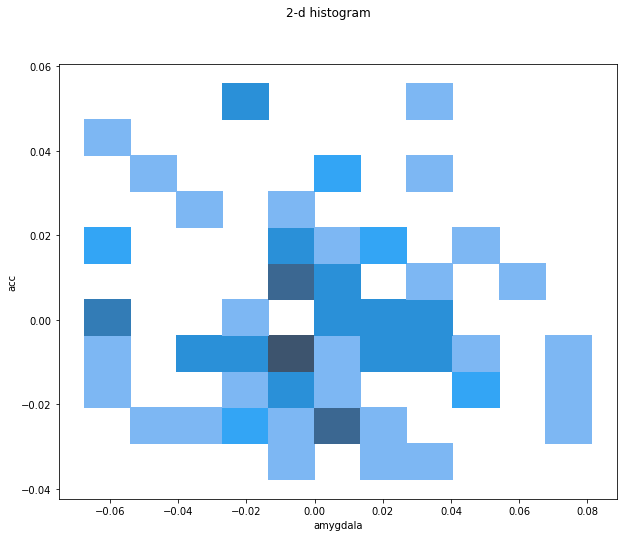

In [297]:

# 2dimensional histogram 
# Q2.b histogram
fig, axes = plt.subplots(figsize=(10,8))
fig.suptitle('2-d histogram')

sns.histplot(data=data, x="amygdala", y="acc", binwidth=(amyg_binSize,acc_binSize))

[-0.0676 -0.0377  2.    ]
[0.0812 0.0559 5.    ]


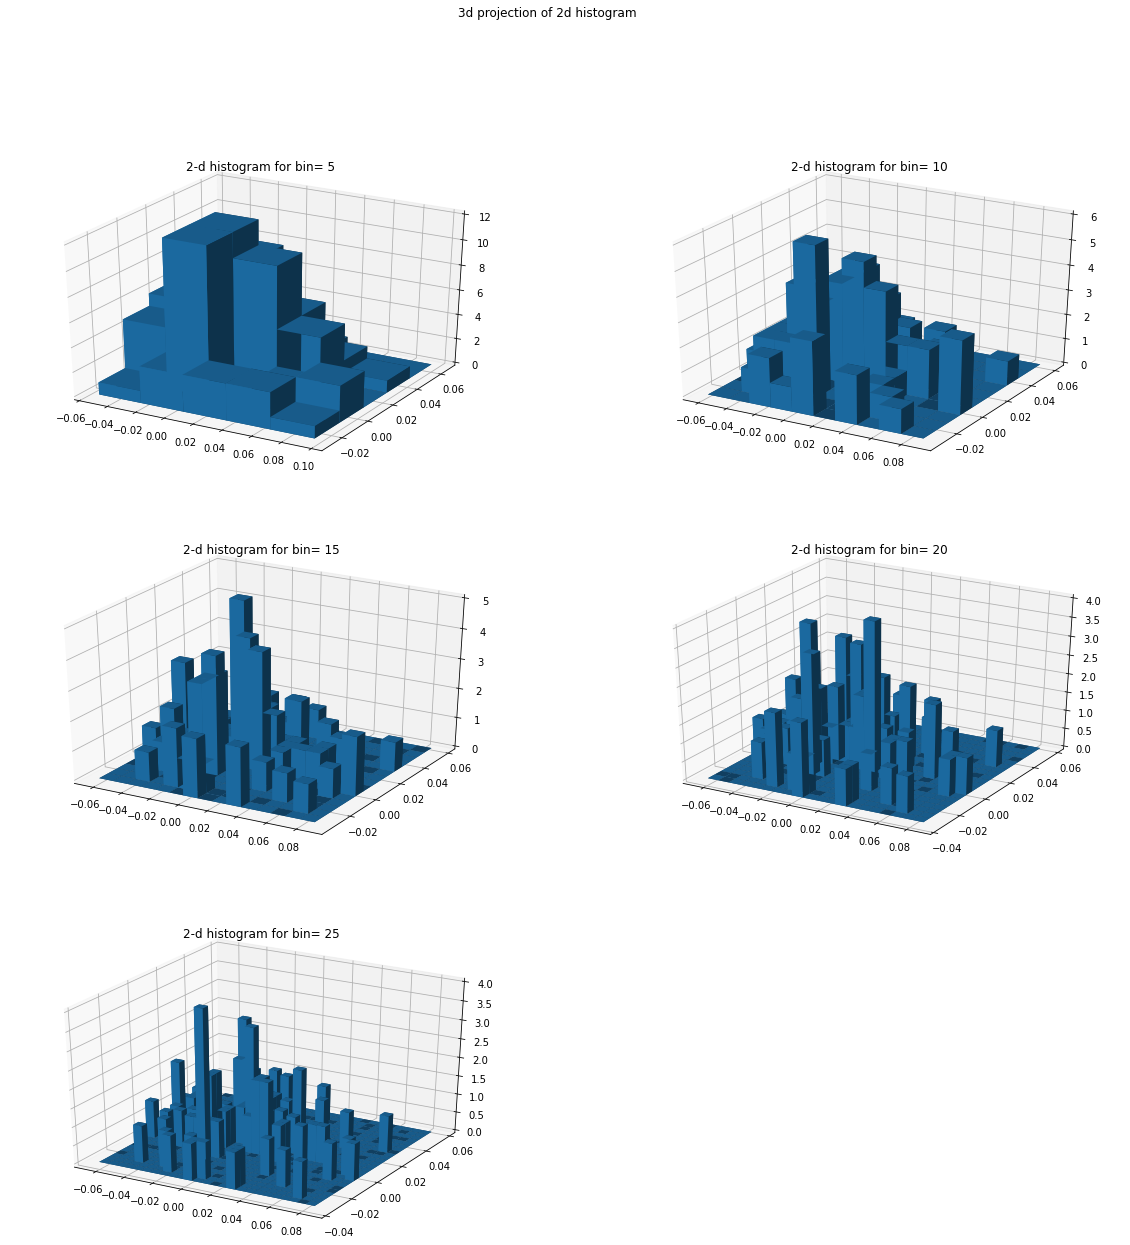

In [292]:
#Source: demo code provided by prof X.
# Q2c 3d projection of 2d histogram
data = pd.read_csv('data/n90pol.csv',header=0).to_numpy()
print(data.min(0))
print(data.max(0))
# for 2 dimensional data
min_data = data.min(0)
max_data = data.max(0)
fig = plt.figure(figsize=(20,20))
fig.suptitle("3d projection of 2d histogram")
i=0
for nbin in (5,10,15,20,25):    
    
    ax = fig.add_subplot(3,2,i+1, projection='3d')
    ax.set_title("2-d histogram for bin= %s"%nbin)
    hist, xedges, yedges = np.histogram2d(data[:,0], data[:,1], bins=nbin)
    xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
    xpos = xpos.flatten()/2.
    ypos = ypos.flatten()/2.
    zpos = np.zeros_like (xpos)
    dx = xedges [1] - xedges [0]
    dy = yedges [1] - yedges [0]
    dz = hist.flatten()
    ax.bar3d(xpos, ypos, zpos, dx, dy, dz )
    i+=1

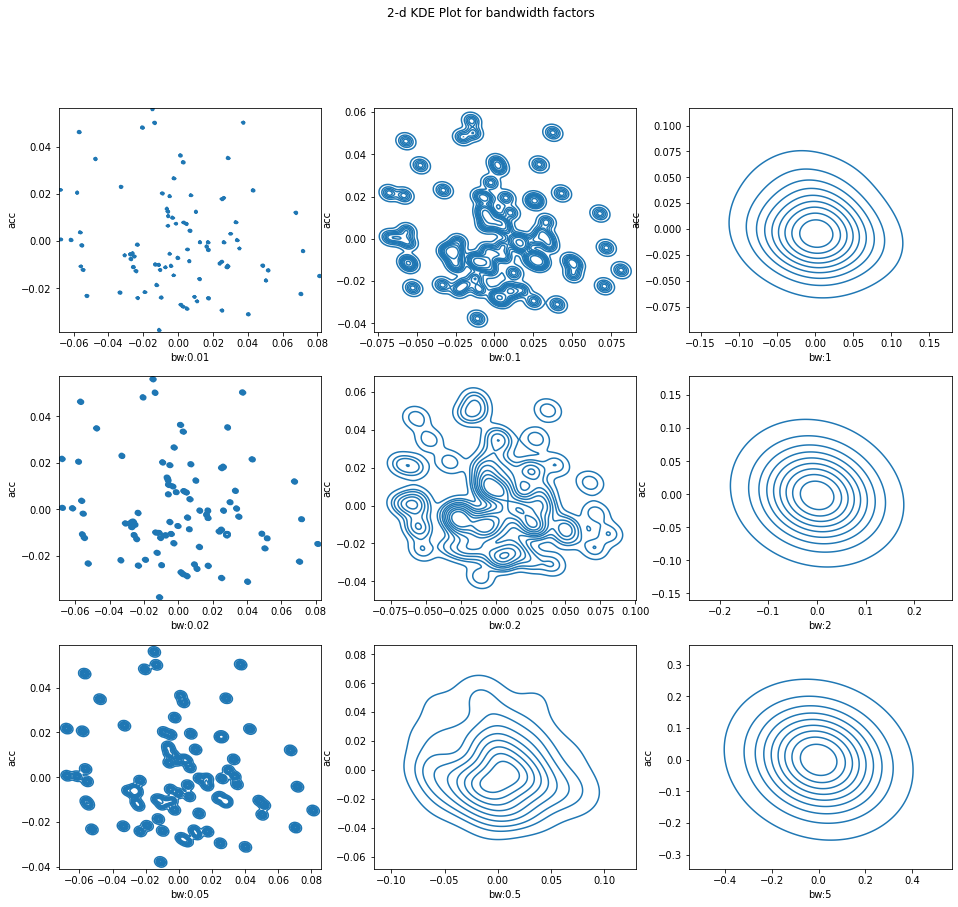

In [302]:
#source: https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html
# Q2c - 2d kde
bws=(0.01,0.02,0.05,0.1,0.2,0.5,1,2,5)
fig, axes = plt.subplots(3,3,figsize=(16,14))
i=0
j=0
for bw in bws:
    fig.suptitle('2-d KDE Plot for bandwidth factors')
    sns.kdeplot(ax=axes[i][j],data=data, x="amygdala", y="acc",bw_method=bw)
    axes[i][j].set_xlabel("bw:%s"%bw)
    i+=1
    if i==3:
        j+=1
        i=0

(2, 90)
<class 'numpy.ndarray'>
(1, 90)
*** y ***
[[-0.0286  0.0007 -0.011  -0.0167 -0.0005]]
*** x ***
[[ 0.0051 -0.0674 -0.0257  0.0504  0.0125]]
*** p_x_y ****
(90,)
[115.26710645  54.5068419  169.32980185  71.88165141 208.22954794]
*** p_x ****
[12.19781554  2.70213481  7.68356675  3.44448479 11.03490713]
*** p_y ****
[ 8.79082075 18.28101722 20.49433324 17.20496917 18.98572666]
*** diff ***
[ 8.0382965   5.10906886 11.86022436 12.61939671 -1.27618253]


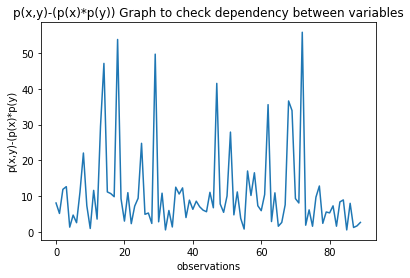

In [306]:
# q2.c verification if the 2 variables are independent

# df.loc[0:1, 'Name':'Address'] 
data_2d_array=data.iloc[:,0:2].values
# display(data_2d_array.T)
print(data_2d_array.T.shape)
b=np.atleast_2d(a)
print(type(b))
print(b.shape)

amygdala_data=np.atleast_2d(data.iloc[:, 0].to_numpy())
acc_data=np.atleast_2d(data.iloc[:, 1].to_numpy())

kde = gaussian_kde(data_2d_array.T)
p_x_y=kde.evaluate(data_2d_array.T)

kde_x = gaussian_kde(np.atleast_2d(amygdala_data))
p_x=kde_x.evaluate(np.atleast_2d(amygdala_data))

kde_y = gaussian_kde(np.atleast_2d(acc_data))
p_y=kde_y.evaluate(np.atleast_2d(acc_data))

print("*** y ***")
print(np.atleast_2d(data.iloc[0:5, 1]))
      
print("*** x ***")
print(np.atleast_2d(data.iloc[0:5, 0]))
      

print("*** p_x_y ****")
print(p_x_y.shape)
print(p_x_y[:5])

print("*** p_x ****")
print(p_x[:5])

print("*** p_y ****")
print(p_y[:5])
dif=p_x_y - (p_x * p_y)
print("*** diff ***")
print(dif[:5])


plt.plot(range(0,90),abs(dif))
plt.title('p(x,y)-(p(x)*p(y)) Graph to check dependency between variables')
plt.xlabel('observations')
plt.ylabel('p(x,y)-(p(x)*p(y)')
plt.show()

[0.01906153846153846, 0.0005875, -0.004719512195121951, -0.005691666666666665, -0.014769230769230769, 0.0016708333333333338, 0.0013097560975609756, 0.008141666666666667]


Text(0.5, 1.0, 'acc')

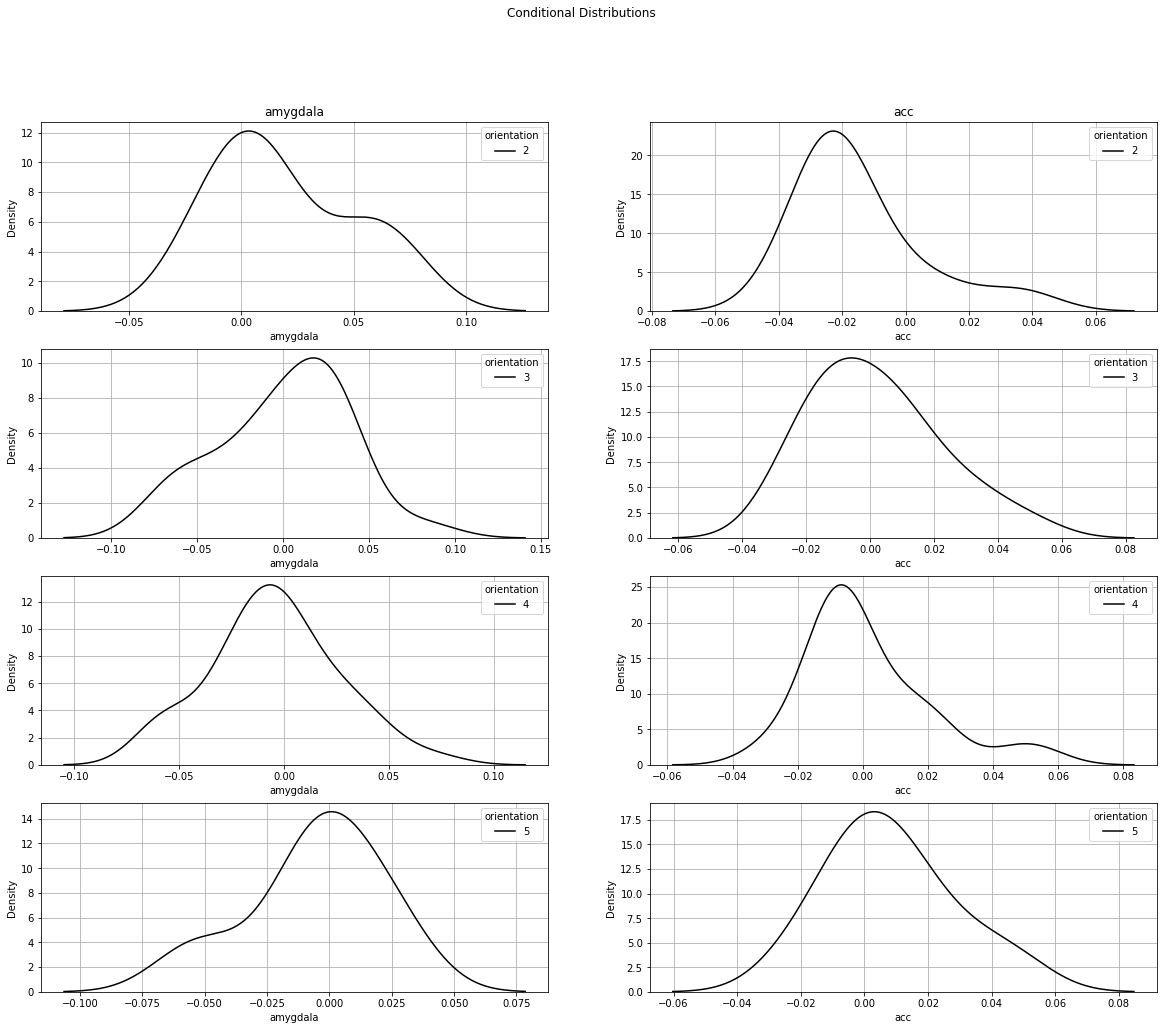

In [333]:
fig, axes = plt.subplots(4,2,figsize=(20,16))
fig.suptitle("Conditional Distributions")
means=[]
i=0
j=0
# amygdala
for orientation in [2,3,4,5]:
    means.append(np.mean(data[data.orientation==orientation].iloc[:,0]))
    sns.kdeplot(ax=axes[i][j],data=data[data.orientation==orientation], x='amygdala', hue='orientation',palette='gist_earth')
    axes[i][j].grid(b=True,which='both')
    i+=1
# acc    
i=0
j=1
for orientation in [2,3,4,5]:
    means.append(np.mean(data[data.orientation==orientation].iloc[:,1]))
    sns.kdeplot(ax=axes[i][j],data=data[data.orientation==orientation], x='acc', hue='orientation',palette='gist_earth')
    axes[i][j].grid(b=True,which='both')
    i+=1
print(means)
axes[0][0].set_title("amygdala")
axes[0][1].set_title("acc")



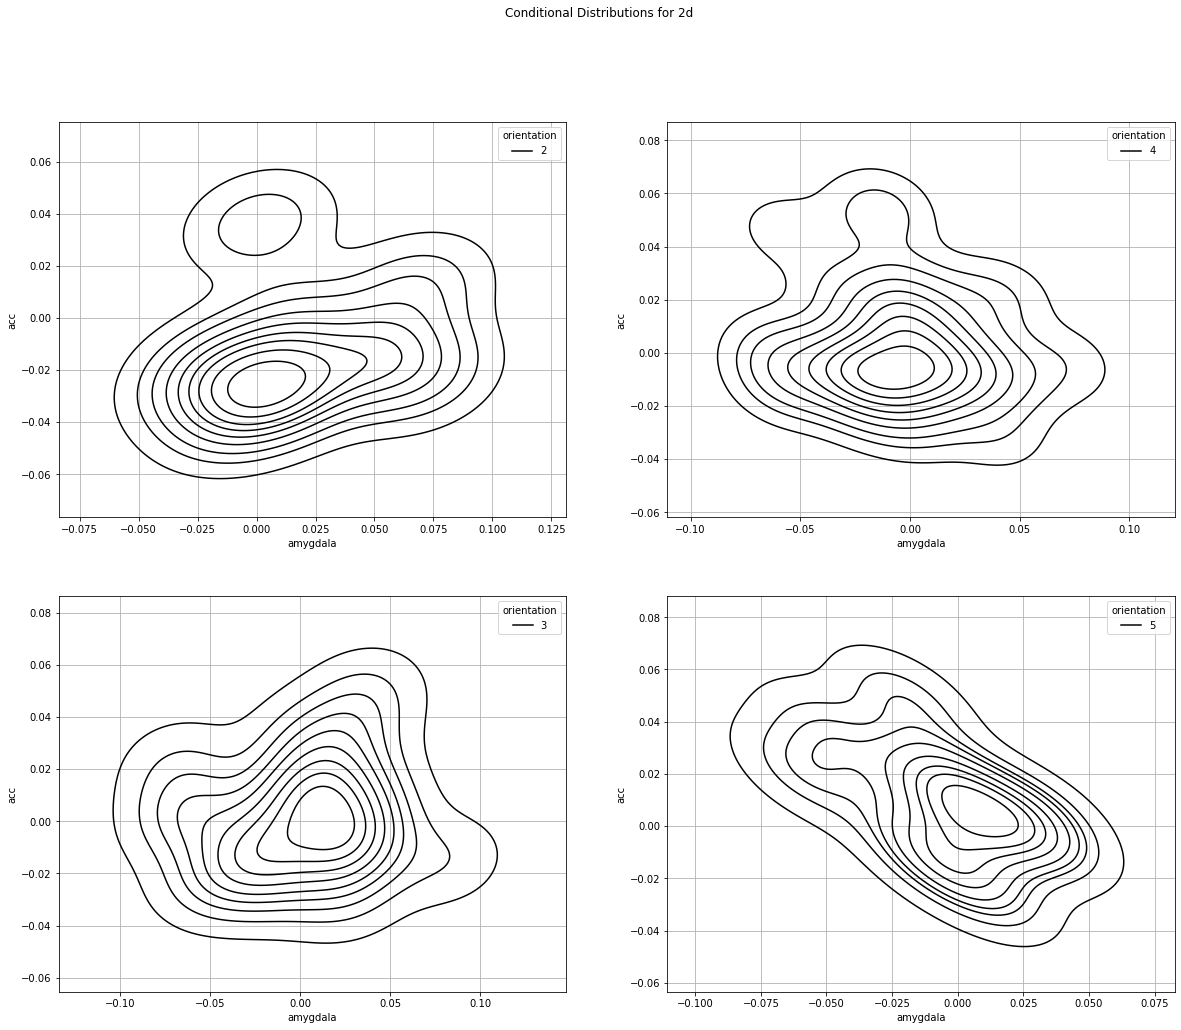

In [338]:
fig, axes = plt.subplots(2,2,figsize=(20,16))
fig.suptitle("Conditional Distributions for 2d")
means=[]
i=0
j=0
# amygdala
for orientation in [2,3,4,5]:
    sns.kdeplot(ax=axes[i][j],data=data[data.orientation==orientation], x='amygdala',y='acc',hue='orientation',palette='gist_earth')
    axes[i][j].grid(b=True,which='both')
    i+=1
    if i>1:
        j+=1
        i=0